<a href="https://colab.research.google.com/github/BDavidReyesU/Talento-tech/blob/main/Convolucion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
# Definir las señales de entrada y el filtro
x = np.array([2, 1, 0, 1, 2]) # Señal de entrada h = np.array([1, -1])
# Realizar la convolución
# Filtro
y = np.convolve(x, h, mode='valid')
# Imprimir el resultado
print("Señal de salida después de la convolución:")
print(y)

Señal de salida después de la convolución:
[-1 -1  1  1]


Convolucion 2 D

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Define the input matrix (signal) and the kernel
input_matrix = np.array([
    [1, 2, 3, 3],
    [4, 5, 6, 6],
    [7, 8, 9, 9],
    [7, 8, 9, 9]
])

kernel = np.array([
    [0, 1, 0],
    [-1, 1, -1],
    [0, 1, 0]
])

# Perform 2D convolution
output_matrix = convolve2d(input_matrix, kernel, mode='valid')

# Print the output matrix
print("Output matrix after convolution:")
print(output_matrix)


Output matrix after convolution:
[[5 7]
 [5 7]]


Capa convolucional en una red neuronal

In [ ]:
import cv2
import numpy as np

# Cargar la imagen
image = cv2.imread('imagen.jpg')

# Definir el kernel de convolución
kernel = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

# Aplicar la convolución
convolved_image = cv2.filter2D(image, -1, kernel)

# Mostrar la imagen original y la imagen convolucionada
cv2.imshow('Imagen original', image)
cv2.imshow('Imagen convolucionada', convolved_image)

# Esperar la interacción del usuario y cerrar ventanas
cv2.waitKey(0)
cv2.destroyAllWindows()


# Redes Neuronal Convolucional aplicadas en MNIST reconocimiento de dígitos manuscritos

In [ ]:
import keras
# Cargar el conjunto de datos MNIST
mnist = keras.datasets.mnist
# Cargar la división de entrenamiento y prueba del conjunto de datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


Label: 0
Image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

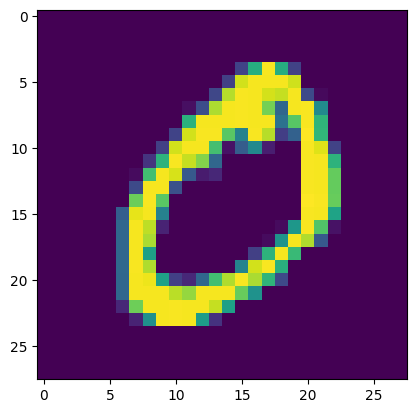

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Puedes poner aquí entre 0 y 59999
index = 1

# Imprime la etiqueta y la imagen.
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n{training_images[index]}')

# Visualiza la imagen
plt.imshow(training_images[index])


In [ ]:
# Normalizar los valores de píxeles del tren y probar las imágenes.
training_images = training_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Construir el modelo de clasificación.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Imprimir un resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2577 - accuracy: 0.9264
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1121 - accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0768 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0580 - accuracy: 0.9822
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0448 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0335 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0298 - accuracy: 0.9910
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0228 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 10/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0

<Axes: >

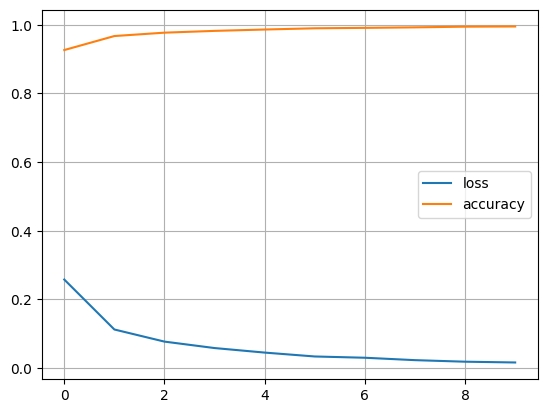

In [ ]:
import pandas as pd

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)


In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento: ", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba: ", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1875/1875 [==============================] - 9s 4ms/step - loss: 0.0114 - accuracy: 0.9967
Pérdida en el conjunto de entrenamiento: 0.011420732364058495
Precisión en el conjunto de entrenamiento:  0.9967166781425476
313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9796
Pérdida en el conjunto de prueba:  0.08020404726266861
Precisión en el conjunto de prueba: 0.9796000123023987


In [ ]:
# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


313/313 [==============================] - 1s 2ms/step - loss: 0.0802 - accuracy: 0.9796
Pérdida en el conjunto de prueba: 0.08020404726266861
Precisión en el conjunto de prueba: 0.9796000123023987


PRENDAS DE VESTIR

In [ ]:
import keras

# Cargue el conjunto de datos Fashion MNIST
fmnist = keras.datasets.fashion_mnist

# Cargue la división de entrenamiento y prueba del conjunto de datos Fashion MNIST
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Label: 0
Image:
[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  1

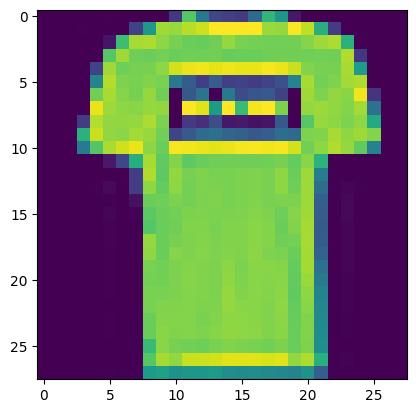

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Puedes poner aquí entre 0 y 59999
index = 1

# Imprime la etiqueta y la imagen.
np.set_printoptions(linewidth=320)
print(f'Label: {training_labels[index]}')
print(f'Image:\n{training_images[index]}')

# Visualiza la imagen
plt.imshow(training_images[index])


In [ ]:
# Normalizar los valores de píxeles del tren y probar las imágenes.
training_images = training_images / 255.0
test_images = test_images / 255.0


In [ ]:
# Construir el modelo de clasificación.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4967 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3727 - accuracy: 0.8651
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3356 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3113 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2943 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2778 - accuracy: 0.8981
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2657 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2556 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2463 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2

<Axes: >

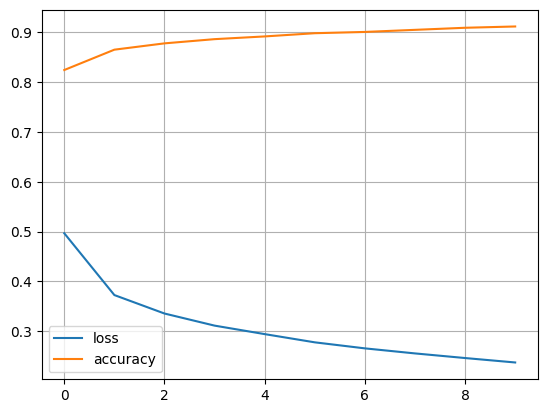

In [ ]:
# Graficar el historial de entrenamiento:
import pandas as pd

pd.DataFrame(history.history).plot(grid=True)


In [ ]:
# Evaluar el modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(training_images, training_labels)
print("Pérdida en el conjunto de entrenamiento:", loss)
print("Precisión en el conjunto de entrenamiento:", accuracy)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print("Pérdida en el conjunto de prueba:", loss)
print("Precisión en el conjunto de prueba:", accuracy)


1875/1875 [==============================] - 5s 3ms/step - loss: 0.2261 - accuracy: 0.9146
Pérdida en el conjunto de entrenamiento: 0.2260735183954239
Precisión en el conjunto de entrenamiento: 0.9146000146865845
313/313 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8772
Pérdida en el conjunto de prueba: 0.3424164056777954
Precisión en el conjunto de prueba: 0.8772000074386597


In [ ]:
# Predict
index = 1
print(f'Label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'Classification:\n{classification.reshape(-1, 1)}')
